## CSV导入File GDB
python版本：2.7

核心第三方包：arcpy

数据：
- [pois.txt](./pois.txt): 陕西省内旅游景点数据，坐标系4326 (经度字段：lng，维度字段：lat)

In [1]:
import os

In [2]:
import arcpy

In [3]:
def CreateGDB(dir, gdbName):
    gdb = os.path.join(dir, gdbName + ".gdb")
    if not os.path.exists(gdb):
        arcpy.CreateFileGDB_management(dir, gdbName + ".gdb")
    print ("GDB Created, Path: {0}".format(gdb))
    return gdb

In [4]:
arcpy.env.workspace = CreateGDB(".","data_nb")

GDB Created, Path: .\data_nb.gdb


In [5]:
sr = arcpy.SpatialReference(4326)

In [6]:
csvpath = "./pois.txt"

 [创建 XY 事件图层工具](http://desktop.arcgis.com/zh-cn/arcmap/latest/tools/data-management-toolbox/make-xy-event-layer.htm)

In [7]:
arcpy.MakeXYEventLayer_management(
    csvpath, "lng", "lat", "temp", arcpy.SpatialReference(4326))

<Result 'temp'>

In [8]:
arcpy.CopyFeatures_management("temp", "imported_poi")

<Result '.\\data_nb.gdb\\imported_poi'>

In [9]:
arcpy.Delete_management("temp")

<Result 'true'>

In [10]:
print(arcpy.ListFeatureClasses())

[u'imported_poi']


In [11]:
%matplotlib inline

In [12]:
import geopandas as gpd

In [13]:
data = gpd.read_file(arcpy.env.workspace, layer=u"imported_poi")

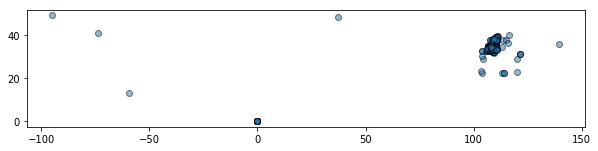

In [14]:
data.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')